In [2]:
from google.colab import files
uploaded=files.upload()

Saving houses.csv to houses.csv


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

data_new=pd.read_csv('houses.csv')
data_new.head(5)

,property_name,link,society,price,rate,area,areaWithType,bedRoom,bathroom,balcony,...,address,noOfFloor,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating,property_id
0,5 Bedroom House for sale in Sector 70A Gurgaon,https://www.99acres.com/5-bhk-bedroom-independ...,Bptp Visionnaire,5.25 Crore,"₹ 20,115/sq.ft.",(242 sq.m.) Plot Area,Plot area 290(242.48 sq.m.),5 Bedrooms,4 Bathrooms,3+ Balconies,...,"29b, Sector 70A Gurgaon, Gurgaon, Haryana",3 Floors,North-East,0 to 1 Year Old,"['Good Earth City Center 2', 'Kunskapsskolan I...",Do you wish to buy an independent house in sec...,"['1 Wardrobe', '1 Fan', '1 Exhaust Fan', '1 Ge...","['Feng Shui / Vaastu Compliant', 'Private Gard...","['Environment5 out of 5', 'Lifestyle4 out of 5...",K70037724
1,5 Bedroom House for sale in Sector 21A Faridabad,https://www.99acres.com/5-bhk-bedroom-independ...,NaN,5.7 Crore,"₹ 105,751/sq.ft.",(50 sq.m.) Plot Area,Plot area 539(50.07 sq.m.),5 Bedrooms,4 Bathrooms,2 Balconies,...,"Sector 21A Faridabad, Gurgaon, Haryana",2 Floors,NaN,5 to 10 Year Old,NaN,"Hi, we have an independent house/villa availab...","['1 Water Purifier', '5 Fan', '1 Exhaust Fan',...","['Private Garden / Terrace', 'Park', 'Visitor ...",NaN,E69288322
2,10 Bedroom House for sale in Sushant Lok Phase 1,https://www.99acres.com/10-bhk-bedroom-indepen...,NaN,2.1 Crore,"₹ 38,251/sq.ft.",(51 sq.m.) Plot Area,Plot area 61(51 sq.m.),10 Bedrooms,10 Bathrooms,3+ Balconies,...,"Sushant Lok Phase 1, Gurgaon, Haryana",5 Floors,West,0 to 1 Year Old,"['Sector 42-43 metro station', 'Huda city cent...","Monthly rental income is rs1,40,000/- Best opt...","['10 Bed', '3 Fan', '10 Geyser', '2 Light', 'N...","['Maintenance Staff', 'Water Storage', 'Visito...","['Environment5 out of 5', 'Lifestyle5 out of 5...",F69536898
3,21 Bedroom House for sale in Sector 54 Gurgaon,https://www.99acres.com/21-bhk-bedroom-indepen...,NaN,5 Crore,"₹ 43,066/sq.ft.",(108 sq.m.) Plot Area,Plot area 129(107.86 sq.m.),21 Bedrooms,21 Bathrooms,3+ Balconies,...,"Sector 54 Gurgaon, Gurgaon, Haryana",5 Floors,North,1 to 5 Year Old,"['Sector 53-54 metro station', 'Sector 54 chow...","129 sq yd plot size. 5 floors built up , fully...","['1 Water Purifier', '21 Fan', '1 Fridge', '1 ...","['Feng Shui / Vaastu Compliant', 'Private Gard...","['Environment4 out of 5', 'Lifestyle5 out of 5...",R69483164
4,12 Bedroom House for sale in Sushant Lok Phase 1,https://www.99acres.com/12-bhk-bedroom-indepen...,NaN,3 Crore,"₹ 53,763/sq.ft.",(52 sq.m.) Plot Area,Plot area 62(51.84 sq.m.),12 Bedrooms,12 Bathrooms,3+ Balconies,...,"1228, Sushant Lok Phase 1, Gurgaon, Haryana",5 Floors,West,Within 6 months,"['Sector 42-43 metro station', 'Huda city cent...",Best for investment purpose. Fully furnished b...,"['1 Water Purifier', '1 Fridge', '12 Fan', '1 ...","['Maintenance Staff', 'Water Storage', 'Visito...","['Environment5 out of 5', 'Lifestyle5 out of 5...",M69381272


In [4]:
column_to_drop=['link','property_id','description','furnishDetails','features']
data_cleaned=data_new.drop(columns=column_to_drop)
data_cleaned.info()
data_cleaned.head(5)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   property_name    1044 non-null   object
 1   society          453 non-null    object
 2   price            968 non-null    object
 3   rate             1005 non-null   object
 4   area             1044 non-null   object
 5   areaWithType     987 non-null    object
 6   bedRoom          987 non-null    object
 7   bathroom         987 non-null    object
 8   balcony          987 non-null    object
 9   additionalRoom   589 non-null    object
 10  address          1031 non-null   object
 11  noOfFloor        967 non-null    object
 12  facing           674 non-null    object
 13  agePossession    987 non-null    object
 14  nearbyLocations  913 non-null    object
 15  rating           907 non-null    object
dtypes: object(16)
memory usage: 130.6+ KB


,property_name,society,price,rate,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,noOfFloor,facing,agePossession,nearbyLocations,rating
0,5 Bedroom House for sale in Sector 70A Gurgaon,Bptp Visionnaire,5.25 Crore,"₹ 20,115/sq.ft.",(242 sq.m.) Plot Area,Plot area 290(242.48 sq.m.),5 Bedrooms,4 Bathrooms,3+ Balconies,Servant Room,"29b, Sector 70A Gurgaon, Gurgaon, Haryana",3 Floors,North-East,0 to 1 Year Old,"['Good Earth City Center 2', 'Kunskapsskolan I...","['Environment5 out of 5', 'Lifestyle4 out of 5..."
1,5 Bedroom House for sale in Sector 21A Faridabad,NaN,5.7 Crore,"₹ 105,751/sq.ft.",(50 sq.m.) Plot Area,Plot area 539(50.07 sq.m.),5 Bedrooms,4 Bathrooms,2 Balconies,"Store Room,Pooja Room,Servant Room","Sector 21A Faridabad, Gurgaon, Haryana",2 Floors,NaN,5 to 10 Year Old,NaN,NaN
2,10 Bedroom House for sale in Sushant Lok Phase 1,NaN,2.1 Crore,"₹ 38,251/sq.ft.",(51 sq.m.) Plot Area,Plot area 61(51 sq.m.),10 Bedrooms,10 Bathrooms,3+ Balconies,Servant Room,"Sushant Lok Phase 1, Gurgaon, Haryana",5 Floors,West,0 to 1 Year Old,"['Sector 42-43 metro station', 'Huda city cent...","['Environment5 out of 5', 'Lifestyle5 out of 5..."
3,21 Bedroom House for sale in Sector 54 Gurgaon,NaN,5 Crore,"₹ 43,066/sq.ft.",(108 sq.m.) Plot Area,Plot area 129(107.86 sq.m.),21 Bedrooms,21 Bathrooms,3+ Balconies,Servant Room,"Sector 54 Gurgaon, Gurgaon, Haryana",5 Floors,North,1 to 5 Year Old,"['Sector 53-54 metro station', 'Sector 54 chow...","['Environment4 out of 5', 'Lifestyle5 out of 5..."
4,12 Bedroom House for sale in Sushant Lok Phase 1,NaN,3 Crore,"₹ 53,763/sq.ft.",(52 sq.m.) Plot Area,Plot area 62(51.84 sq.m.),12 Bedrooms,12 Bathrooms,3+ Balconies,Others,"1228, Sushant Lok Phase 1, Gurgaon, Haryana",5 Floors,West,Within 6 months,"['Sector 42-43 metro station', 'Huda city cent...","['Environment5 out of 5', 'Lifestyle5 out of 5..."


In [5]:
import numpy as np

def convert_price(price_str):
    if pd.isna(price_str):
        return np.nan

    # Convert to string (in case the input is numeric)
    price_str = str(price_str).replace(',', '').lower()
    numeric_part = pd.to_numeric(price_str.split()[0], errors='coerce')

    if 'lac' in price_str:
        return numeric_part * 1e5
    elif 'crore' in price_str:
        return numeric_part * 1e7
    else:
        return numeric_part

# Apply the function to the 'price' column
data_cleaned['numeric_price'] = data_cleaned['price'].apply(convert_price)

# Fill missing values with the mean of 'numeric_price'
data_cleaned.fillna({'numeric_price': data_cleaned['numeric_price'].mean()}, inplace=True)

data_cleaned.head(5)
print(data_cleaned['numeric_price'].head(5))

0    52500000.0
1    57000000.0
2    21000000.0
3    50000000.0
4    30000000.0
Name: numeric_price, dtype: float64


In [6]:
data_cleaned.fillna({'society':data_cleaned['society'].mode()},inplace=True)
data_cleaned.fillna({'facing':data_cleaned['facing'].mode()},inplace=True)


In [7]:
data_cleaned['bedRoom']=pd.to_numeric(data_cleaned['bedRoom'].str.extract('(\d+)')[0],errors='coerce')
data_cleaned['bathroom']=pd.to_numeric(data_cleaned['bathroom'].str.extract('(\d+)')[0],errors='coerce')


In [8]:
data_cleaned.drop_duplicates(inplace=True)

In [9]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1023 entries, 0 to 1043
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   property_name    1023 non-null   object 
 1   society          439 non-null    object 
 2   price            955 non-null    object 
 3   rate             985 non-null    object 
 4   area             1023 non-null   object 
 5   areaWithType     974 non-null    object 
 6   bedRoom          974 non-null    float64
 7   bathroom         974 non-null    float64
 8   balcony          974 non-null    object 
 9   additionalRoom   578 non-null    object 
 10  address          1010 non-null   object 
 11  noOfFloor        955 non-null    object 
 12  facing           662 non-null    object 
 13  agePossession    974 non-null    object 
 14  nearbyLocations  892 non-null    object 
 15  rating           887 non-null    object 
 16  numeric_price    1023 non-null   float64
dtypes: float64(3), obje

Analysis


In [10]:
max_price=data_cleaned['numeric_price'].max()
print(max_price)


315000000.0


In [14]:
houses_morethan3_bedrooms=data_cleaned[data_cleaned['bedRoom']>3].shape[0]
houses_morethan3_bedrooms

696

In [12]:
avg_price_more_than_2_bathrooms=data_cleaned[data_cleaned['bathroom']>2]['numeric_price'].mean()
avg_price_more_than_2_bathrooms

np.float64(57278466.6777798)

In [15]:
north_facing_houses=data_cleaned[data_cleaned['facing'] == 'North'].shape[0]
north_facing_houses


110

In [24]:
facing_count=data_cleaned['facing'].value_counts()#counts the value of each
facing_count
#data_cleaned.shape

,count
facing,
East,178
North-East,158
North,110
West,75
North-West,44
South-East,39
South,34
South-West,24


In [30]:
data_cleaned['area_numeric']=pd.to_numeric(data_cleaned['area'].str.extract('(\d+)')[0],errors='coerce')
min_area=data_cleaned['area_numeric'].min()
min_area

4

In [32]:
data_cleaned['price_per_sqft']=data_cleaned['numeric_price']/data_cleaned['area_numeric']
avg_price_per_sqft=data_cleaned['price_per_sqft'].mean()
avg_price_per_sqft

np.float64(317857.29985606176)

<class 'pandas.core.frame.DataFrame'>
Index: 1023 entries, 0 to 1043
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   property_name    1023 non-null   object 
 1   society          439 non-null    object 
 2   price            955 non-null    object 
 3   rate             985 non-null    object 
 4   area             1023 non-null   object 
 5   areaWithType     974 non-null    object 
 6   bedRoom          974 non-null    float64
 7   bathroom         974 non-null    float64
 8   balcony          974 non-null    object 
 9   additionalRoom   578 non-null    object 
 10  address          1010 non-null   object 
 11  noOfFloor        955 non-null    object 
 12  facing           662 non-null    object 
 13  agePossession    974 non-null    object 
 14  nearbyLocations  892 non-null    object 
 15  rating           887 non-null    object 
 16  numeric_price    1023 non-null   float64
 17  area_numeric     10

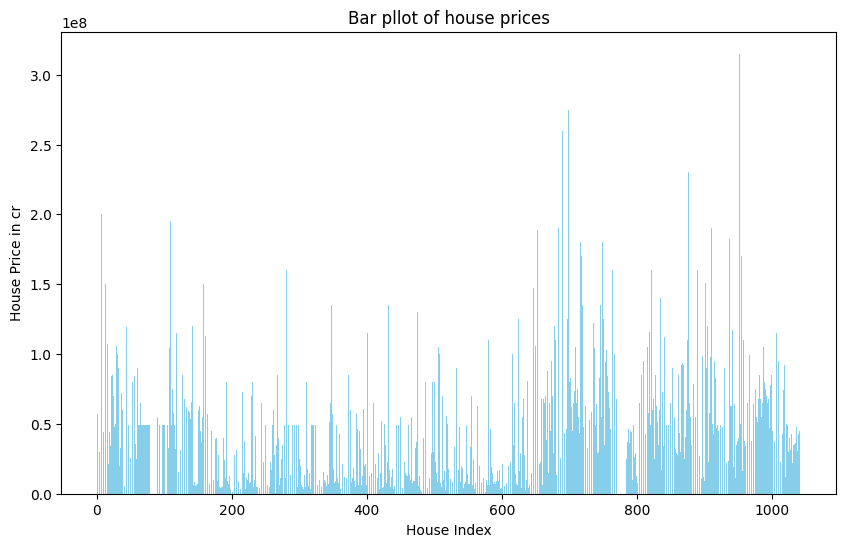

In [36]:
import pandas as pd
data_cleaned=data_cleaned
print(data_cleaned.info())

import matplotlib.pyplot as plt
import seaborn as sns
#Bar plot
plt.figure(figsize=(10,6))
plt.bar(data_cleaned.index,data_cleaned['numeric_price'],color='skyblue')
plt.title('Bar pllot of house prices')
plt.xlabel('House Index')
plt.ylabel('House Price in cr')
plt.show()

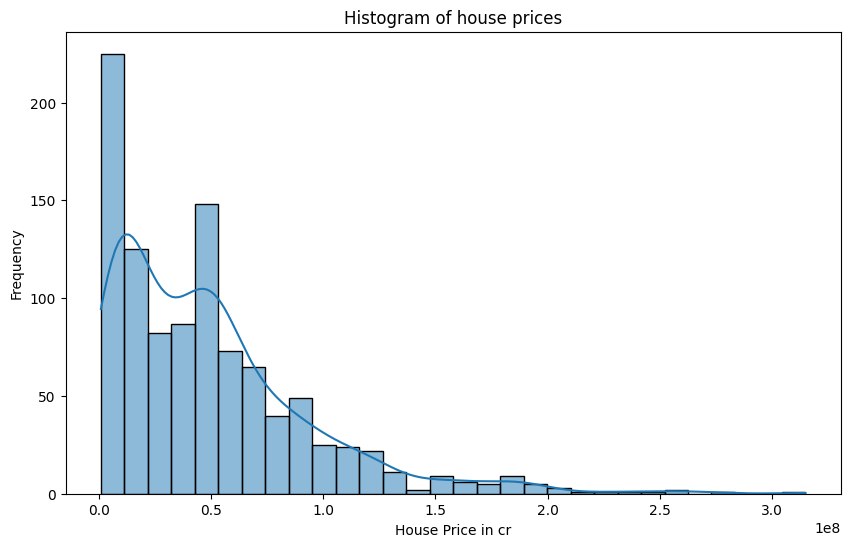

In [46]:
#histogram for price using sea born
plt.figure(figsize=(10,6))
sns.histplot(data_cleaned['numeric_price'],bins=30,kde=True)
plt.title('Histogram of house prices')
plt.xlabel('House Price in cr')
plt.ylabel('Frequency')
plt.show()

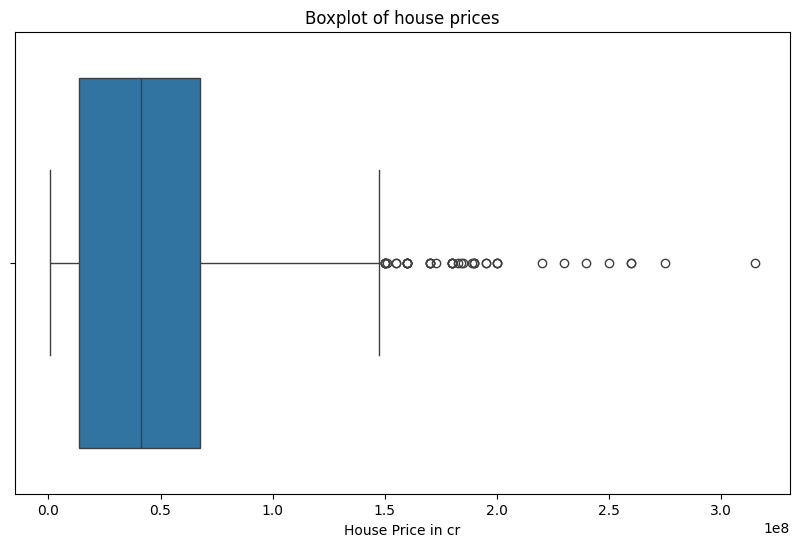

In [50]:
#boxplot for price using sea born
plt.figure(figsize=(10,6))
sns.boxplot(data=data_cleaned,x='numeric_price')
plt.title('Boxplot of house prices')
plt.xlabel('House Price in cr')
plt.show()

   bedRoom  numeric_price
0      1.0   1.211184e+07
1      2.0   1.260636e+07
2      3.0   2.863945e+07


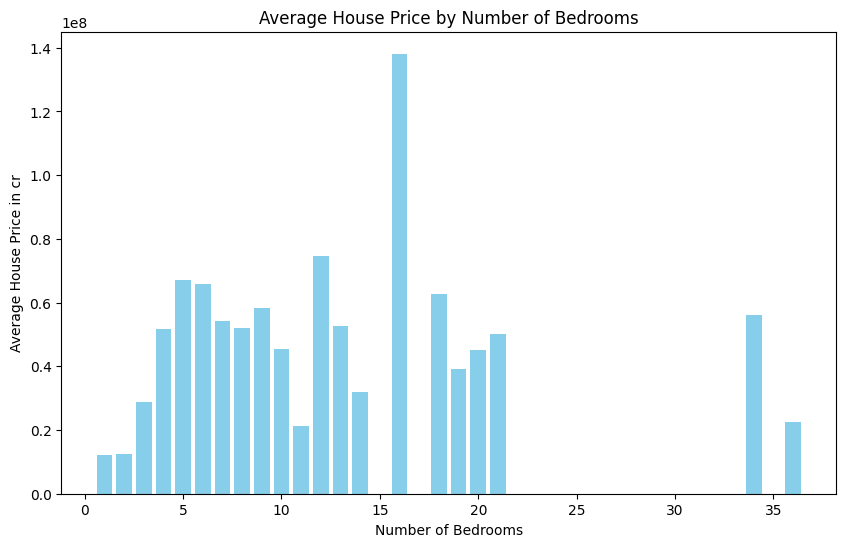

In [53]:
grouped_data=data_cleaned.groupby('bedRoom')['numeric_price'].mean().reset_index()
print(grouped_data.head(3))
plt.figure(figsize=(10,6))
plt.bar(grouped_data['bedRoom'],grouped_data['numeric_price'],color='skyblue')
plt.title('Average House Price by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Average House Price in cr')
plt.show()

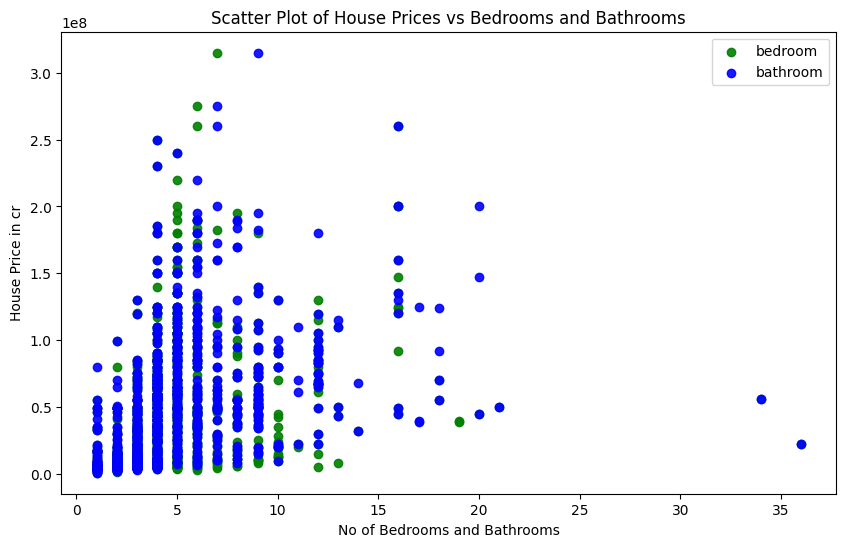

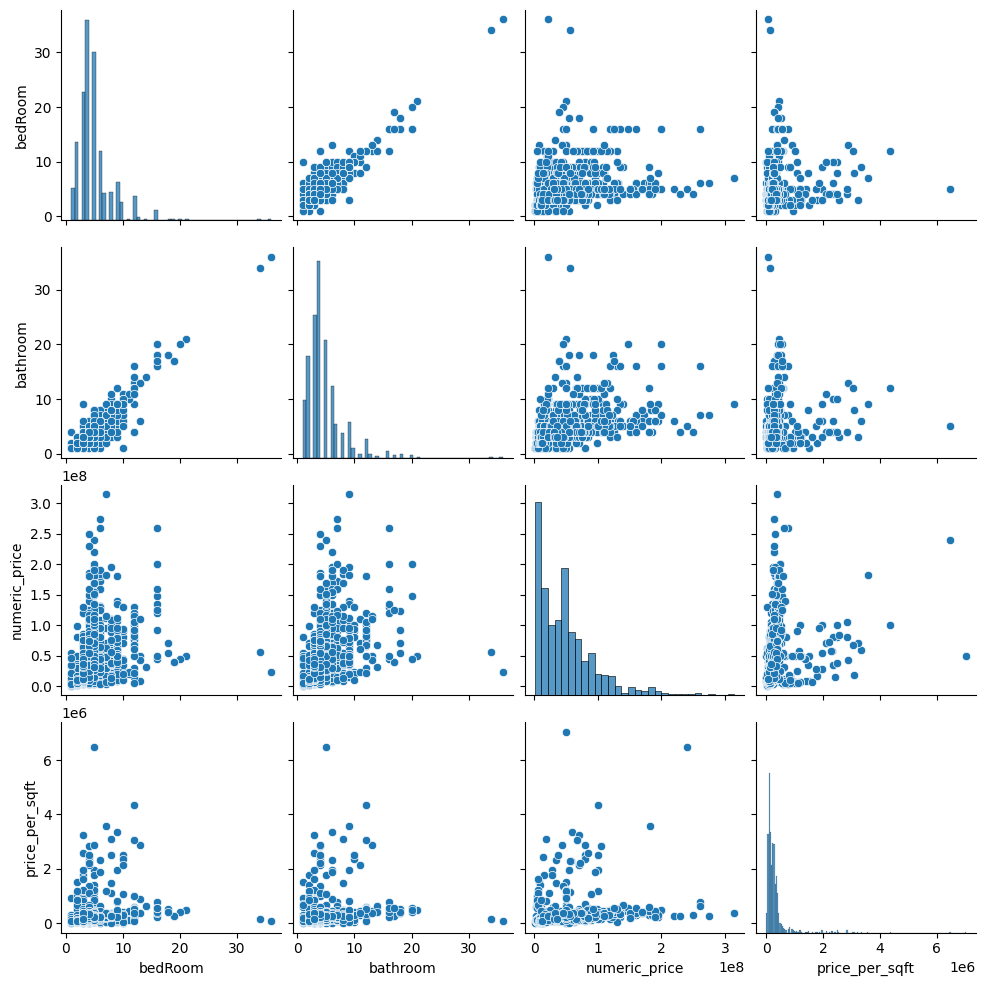

In [63]:
#scatter plot price vs bedroom and bathroom count
plt.figure(figsize=(10,6))
plt.scatter(data_cleaned['bedRoom'],data_cleaned['numeric_price'],alpha=0.9,color='green',label='bedroom')
plt.scatter(data_cleaned['bathroom'],data_cleaned['numeric_price'],alpha=0.9,color='blue',label='bathroom')
plt.title('Scatter Plot of House Prices vs Bedrooms and Bathrooms')
plt.xlabel('No of Bedrooms and Bathrooms')
plt.ylabel('House Price in cr')
plt.legend()
plt.show()

#pair plot
data_cleaned['price_per_sqft']=data_cleaned['numeric_price']/data_cleaned['area_numeric']
sns.pairplot(data_cleaned,vars=['bedRoom','bathroom','numeric_price','price_per_sqft'])
plt.show()

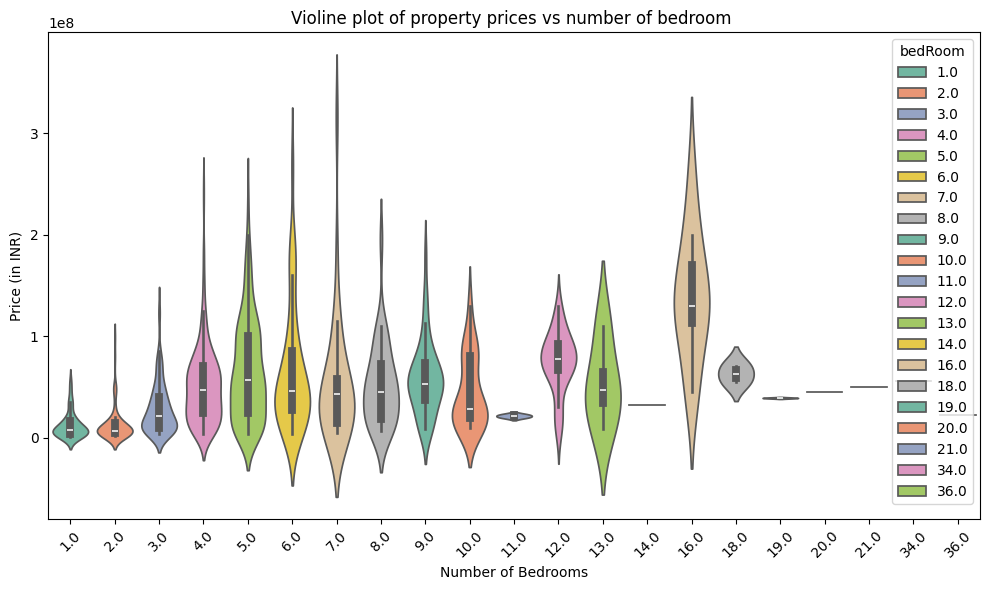

In [71]:
#violin chart
plt.figure(figsize=(10,6))
sns.violinplot(x='bedRoom',y='numeric_price',hue='bedRoom',data=data_cleaned,palette='Set2')
plt.title('Violine plot of property prices vs number of bedroom ')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price (in INR)')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()